## Step 0 - Importing modules and dataset

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

issues_dataset = pd.read_csv('../data/dataset-backup2.csv')
issues_dataset = issues_dataset.loc[issues_dataset['td-label'] != '-'].drop(['Unnamed: 0'], axis=1)

def plot_hist(data, x_label, y_label, title):
    # matplotlib histogram
    plt.hist(data, color = 'blue', edgecolor = 'black', bins=5)

    # Add labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [60]:
sections_with_td = issues_dataset.loc[issues_dataset['td-label'] != 'non-SATD']

,bot,owner,project,issue,text,type,author-login,open-date,state,close-date,closed-by,n-comments,td-label,td-label-li-emse
38,glassfishrobot,eclipse-ee4j,glassfish-hk2,16,"Per guice documentation, `getExistingBinding()...",body,glassfishrobot,2015-07-08T02:41:26Z,closed,2015-07-08T13:01:09Z,glassfishrobot,2.0,SATD,-
47,glassfishrobot,eclipse-ee4j,soteria,5,@arjantijms Can't build it locally\r\n\r\n```...,body,glassfishrobot,2016-05-10T23:32:26Z,closed,2016-05-11T11:05:57Z,glassfishrobot,2.0,SATD,-
49,glassfishrobot,eclipse-ee4j,soteria,5,@arjantijms Commented \r\nThanks again for the...,comment_1,glassfishrobot,2016-05-11T11:05:57Z,-,-,-,NaN,SATD,-
54,glassfishrobot,eclipse-ee4j,glassfish-hk2,40,There's a comment in the docs to note this fac...,body,glassfishrobot,2016-09-19T23:46:06Z,open,NaN,-,3.0,SATD,-
64,glassfishrobot,eclipse-ee4j,glassfish-hk2,44,Memory leak in Hk2ThreadLocal,title,glassfishrobot,2016-12-15T19:40:37Z,closed,2016-12-16T15:38:28Z,glassfishrobot,15.0,SATD,-


Number of TD per section type

In [68]:
sections_with_td.loc[:,['type','issue']].groupby(['type']).count().sort_values(by='issue', ascending=False).head()

,issue
type,
body,613
title,144
comment_2,132
comment_1,126
comment_0,104


Proportion of sections with td generated by bots

In [74]:
section_generated_by_bots = sections_with_td.loc[sections_with_td['bot'] == sections_with_td['author-login']]
section_generated_by_other_accounts = sections_with_td.loc[sections_with_td['bot'] != sections_with_td['author-login']]

In [75]:
len(section_generated_by_bots)/len(section_generated_by_humans)

0.3005068790731354

## Step 1 - Recovering number of projects per bot

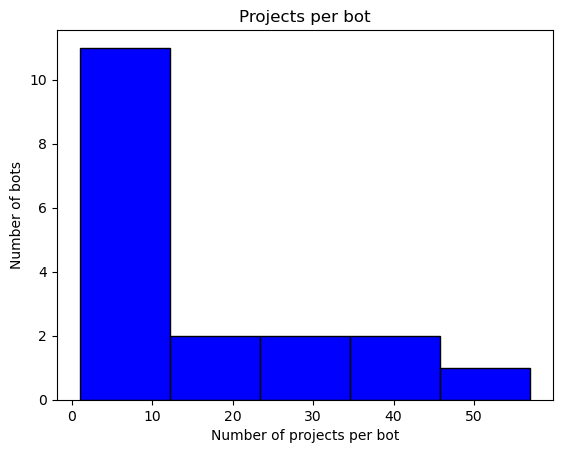

In [40]:
projects_per_bot = issues_dataset.loc[:,['bot', 'project','issue']].groupby(['bot'])['project'].unique()
n_projects = [len(x) for x in projects_per_bot]

plot_hist(data=n_projects, x_label='Number of projects per bot', y_label='Number of bots', title = 'Projects per bot')

Number of projects per bot in which at least one section of the issue contains TD.

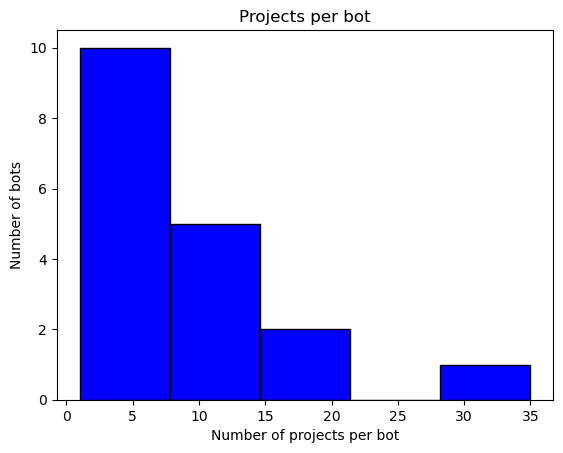

In [41]:
projects_per_bot = issues_dataset.loc[issues_dataset['td-label'] != 'non-SATD',['bot', 'project','issue']].groupby(['bot'])['project'].unique()
n_projects = [len(x) for x in projects_per_bot]

plot_hist(data=n_projects, x_label='Number of projects per bot', y_label='Number of bots', title = 'Projects per bot')

## Step 2 - Recovering the number of issues with TD

#### 2.1. Number of issues with TD

In [44]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] != 'non-SATD')]
    print(f"{b} - {len(issues_bots)}")

glassfishrobot - 125
k8s-ci-robot - 181
brotherlogic - 6
fejta-bot - 223
gopherbot - 102
fire-bot - 7
DartBot - 89
cf-gitbot - 136
element-bot - 3
swift-ci - 149
openshift-bot - 156
0crat - 65
google-oss-bot - 96
ant-design-bot - 8
msft-github-bot - 62
gitcoinbot - 198
rultor - 16
babel-bot - 174


#### Step 2.2. Number of section with TD

In [45]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] != 'non-SATD')]
    print(f"{b} - {len(issues_bots)}")

glassfishrobot - 125
k8s-ci-robot - 181
brotherlogic - 6
fejta-bot - 223
gopherbot - 102
fire-bot - 7
DartBot - 89
cf-gitbot - 136
element-bot - 3
swift-ci - 149
openshift-bot - 156
0crat - 65
google-oss-bot - 96
ant-design-bot - 8
msft-github-bot - 62
gitcoinbot - 198
rultor - 16
babel-bot - 174


#### Step 2.3. Number of sections with TD that were generated by bots

In [46]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] != 'non-SATD')
                                     & (issues_dataset['author-login'] == b)]
    
    issues_bots2 = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] == 'non-SATD')
                                     & (issues_dataset['author-login'] == b)]
    
    print(f"{b} - {len(issues_bots)/(len(issues_bots2)+len(issues_bots))}")

glassfishrobot - 0.05998080614203455
k8s-ci-robot - 0.014634146341463415
brotherlogic - 0.013793103448275862
fejta-bot - 0.05045871559633028
gopherbot - 0.10979228486646884
fire-bot - 0.007614213197969543
DartBot - 0.0726457399103139
cf-gitbot - 0.0
element-bot - 0.0
swift-ci - 0.1343065693430657
openshift-bot - 0.0
0crat - 0.0
google-oss-bot - 0.0
ant-design-bot - 0.0
msft-github-bot - 0.0
gitcoinbot - 0.0
rultor - 0.004484304932735426
babel-bot - 0.0599250936329588


## Step 3 - Users exposed to the bot

#### Step 3.1. in issues with TD

In [14]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] != 'non-SATD')\
                                     & (issues_dataset['author-login'] != b)]
    print(f"{b} - {len(issues_bots['author-login'].unique())}")

glassfishrobot - 0
k8s-ci-robot - 143
brotherlogic - 1
fejta-bot - 121
gopherbot - 56
fire-bot - 15
DartBot - 4
cf-gitbot - 86
vaadin-bot - 0
element-bot - 8
swift-ci - 47
openshift-bot - 80
0crat - 21
google-oss-bot - 98
ant-design-bot - 25
msft-github-bot - 29
gitcoinbot - 8


#### 3.2. in issues without TD

In [16]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] == 'non-SATD')\
                                     & (issues_dataset['author-login'] != b)]
    print(f"{b} - {len(issues_bots['author-login'].unique())}")

glassfishrobot - 0
k8s-ci-robot - 157
brotherlogic - 2
fejta-bot - 108
gopherbot - 30
fire-bot - 18
DartBot - 5
cf-gitbot - 72
vaadin-bot - 0
element-bot - 98
swift-ci - 42
openshift-bot - 70
0crat - 23
google-oss-bot - 109
ant-design-bot - 81
msft-github-bot - 26
gitcoinbot - 5


## Step 4 - Bot's functionality

#### 4.1. Number of issues opened by bots

In [39]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] == 'non-SATD')\
                                     & (issues_dataset['type'] != 'title')\
                                     & (issues_dataset['author-login'] != b)]
    print(f"{b} - {len(issues_bots['author-login'].unique())}")

glassfishrobot - 0
k8s-ci-robot - 141
brotherlogic - 2
fejta-bot - 98
gopherbot - 26
fire-bot - 18
DartBot - 5
cf-gitbot - 51
vaadin-bot - 0
element-bot - 96
swift-ci - 40
openshift-bot - 58
0crat - 18
google-oss-bot - 78
ant-design-bot - 75
msft-github-bot - 17
gitcoinbot - 5


#### 4.1. Number of issues closed by bots

In [40]:
bots = issues_dataset['bot'].unique()
for b in bots:
    issues_bots = issues_dataset.loc[(issues_dataset['bot'] == b) \
                                     & (issues_dataset['td-label'] != 'non-SATD')\
                                     & (issues_dataset['type'] == 'title')\
                                     & (issues_dataset['closed-by'] != b)]
    print(f"{b} - {len(issues_bots['author-login'].unique())}")

glassfishrobot - 1
k8s-ci-robot - 15
brotherlogic - 1
fejta-bot - 21
gopherbot - 11
fire-bot - 1
DartBot - 1
cf-gitbot - 20
vaadin-bot - 0
element-bot - 0
swift-ci - 8
openshift-bot - 26
0crat - 5
google-oss-bot - 19
ant-design-bot - 3
msft-github-bot - 5
gitcoinbot - 2


In [42]:
issues_dataset.head()

,bot,owner,project,issue,text,type,author-login,open-date,state,close-date,closed-by,td-label
0,glassfishrobot,eclipse-ee4j,tyrus,42,"wss://echo.websocket.org Handshake error. ""Res...",title,glassfishrobot,2013-10-26T09:18:31Z,closed,2013-10-29T16:58:07Z,glassfishrobot,code|design-debt
1,glassfishrobot,eclipse-ee4j,tyrus,42,building tyrus 1.3-SNAPSHOT from https://githu...,body,glassfishrobot,2013-10-26T09:18:31Z,closed,2013-10-29T16:58:07Z,glassfishrobot,documentation-debt
2,glassfishrobot,eclipse-ee4j,tyrus,42,* **Issue Imported From:** https://github.com/...,comment_0,glassfishrobot,2018-02-10T19:34:55Z,-,-,-,non-SATD
3,glassfishrobot,eclipse-ee4j,tyrus,42,@cthiebaud Commented \r\nThe same DocClient.ja...,comment_1,glassfishrobot,2013-10-26T11:25:56Z,-,-,-,code|design-debt
4,glassfishrobot,eclipse-ee4j,tyrus,42,@pavelbucek Commented \r\nplease don't use git...,comment_2,glassfishrobot,2013-10-29T16:58:07Z,-,-,-,code|design-debt
